## import modules

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set_style("white")

---
## load data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
## statistics

In [4]:
train_data.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
## separating numerical + target values

In [6]:
num_feature_names = ["Age", "SibSp", "Parch", "Fare"] + ["Survived"]
num_feature_names

['Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [7]:
train_data_num = train_data[num_feature_names]
train_data_num.shape

(891, 5)

In [8]:
train_data_num.head()

,Age,SibSp,Parch,Fare,Survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


---
## histograms

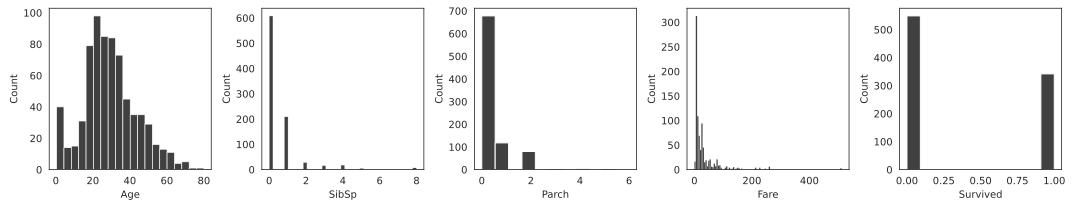

In [9]:
# make histograms
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(3*len(num_feature_names), 3))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(data=train_data_num[num_feature_name], ax=axs[i], color="k")
fig.tight_layout()
plt.show()

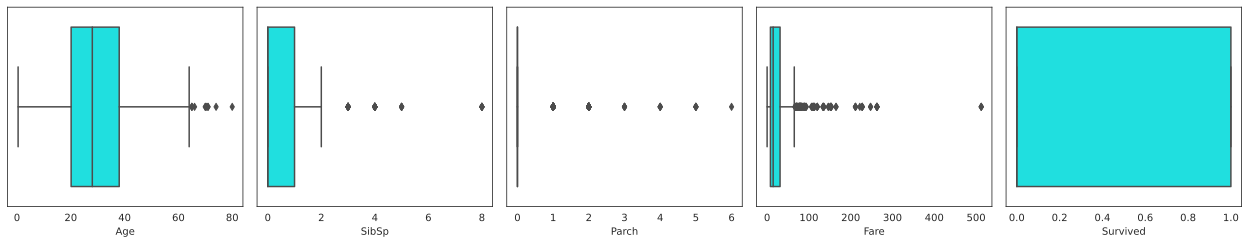

In [10]:
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(3.5*len(num_feature_names), 3.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.boxplot(x=num_feature_name, data=train_data_num, ax=axs[i], color="cyan")
fig.tight_layout()
plt.show()

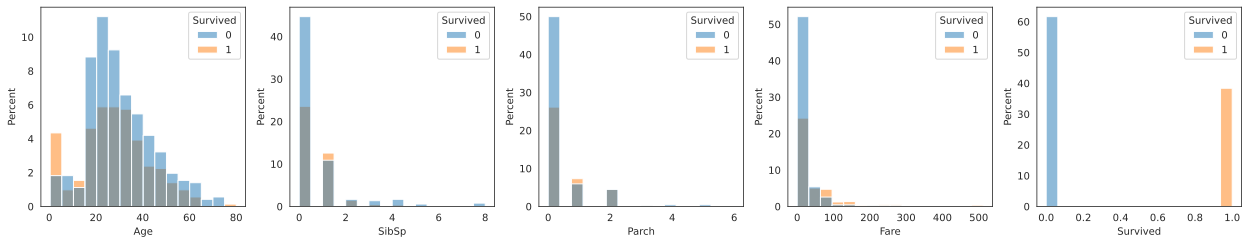

In [11]:
# make histograms
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(3.5*len(num_feature_names), 3.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(x=num_feature_name, data=train_data_num, hue="Survived", ax=axs[i], stat="percent", bins=16, color="k")
fig.tight_layout()
plt.show()

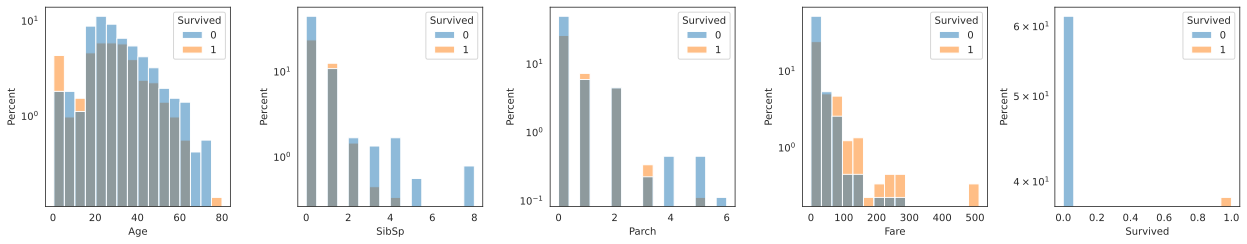

In [12]:
# make histograms
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(3.5*len(num_feature_names), 3.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(x=num_feature_name, data=train_data_num, hue="Survived", ax=axs[i], stat="percent", bins=16, color="k")
    axs[i].set_yscale("log")
fig.tight_layout()
plt.show()

---
## correlation

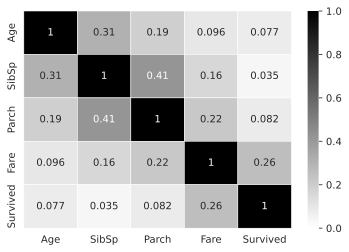

In [13]:
corr = train_data_num.corr(method="pearson").abs()
sns.heatmap(corr, vmin=0, vmax=1, cmap="binary", annot=True, linewidths=0.5);

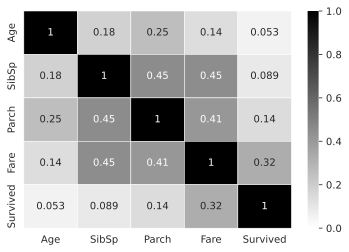

In [14]:
corr = train_data_num.corr(method="spearman").abs()
sns.heatmap(corr, vmin=0, vmax=1, cmap="binary", annot=True, linewidths=0.5);

In [15]:
corr[["Survived"]].sort_values(by="Survived", ascending=False)

,Survived
Survived,1.000000
Fare,0.323736
Parch,0.138266
SibSp,0.088879
Age,0.052565


---
## pivot tabelle

In [16]:
pd.pivot_table(train_data_num, index="Survived", values = num_feature_names, aggfunc=["mean", "median"]).round(2)

mean                    median                  
            Age   Fare Parch SibSp    Age  Fare Parch SibSp
Survived                                                   
0         30.63  22.12  0.33  0.55   28.0  10.5     0     0
1         28.34  48.40  0.46  0.47   28.0  26.0     0     0

---
## separate categorial features from data

In [17]:
cat_feature_names = ["Pclass", "Sex", "Ticket", "Cabin", "Embarked"] + ["Survived"]
cat_feature_names

['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived']

In [18]:
train_data_cat = train_data[cat_feature_names]

In [19]:
train_data_cat.head()

,Pclass,Sex,Ticket,Cabin,Embarked,Survived
0,3,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,3,female,STON/O2. 3101282,NaN,S,1
3,1,female,113803,C123,S,1
4,3,male,373450,NaN,S,0


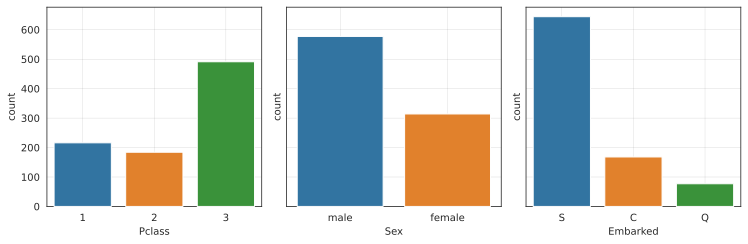

In [20]:
cols_to_plot = ["Pclass", "Sex", "Embarked"]
fig, axs = plt.subplots(1, len(cols_to_plot), figsize=(3.5*len(cols_to_plot), 3.5), sharey=True)

for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, data=train_data_cat, ax=axs[i], zorder=10)
    axs[i].grid(color="k", alpha=0.25, linewidth=0.25, zorder=0)
fig.tight_layout()
plt.show()

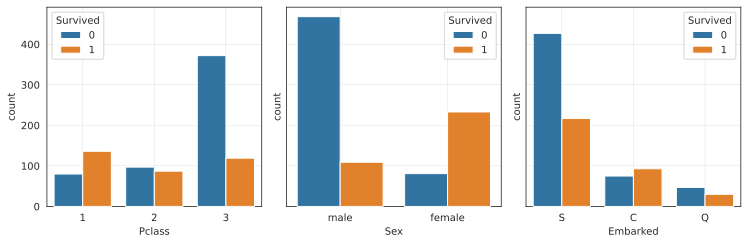

In [21]:
fig, axs = plt.subplots(1, len(cols_to_plot), figsize=(3.5*len(cols_to_plot), 3.5), sharey=True)

for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, hue="Survived", data=train_data_cat, ax=axs[i], zorder=10)
    axs[i].grid(color="k", alpha=0.25, linewidth=0.25, zorder=0)
fig.tight_layout()
plt.show()